In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
root_dir = '/Users/kessapassa/OneDrive/research_log/20190114/'

In [3]:
dir_list = ['people10000', 'people20000', 'people30000']
seed_list = [str(123 + i) for i in range(3)]
csv_list = ['census']
times_list = [str(3600 * (i + 1)) for i in range(6)]
area_one_length = 9

In [4]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(area_one_length)]))
    return df

In [5]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // area_one_length)
        col = str(area_id % area_one_length) + '0'
        base.loc[row, col] = r[2]
        
    return base

In [6]:
base = create_base_dataframe()

csv_array = {}
for _dir in dir_list:
    csv_array[_dir] = {}
    for _seed in seed_list:
        csv_array[_dir][_seed] = {}
        for _csv in csv_list:
            csv_array[_dir][_seed][_csv] = {}
            df = pd.read_csv(root_dir + '2D/' + _dir + 'seed' + _seed + '_' + _csv + '.csv',
                                                    encoding='Shift_JISx0213')
            df['time'] = df['time'].apply(lambda x: str(int(x)))
            
            group_list = df.groupby(['time'], sort=False)
            for _times, _group in group_list:
                df = convert_area_to_contour(base.copy(), _group.copy())
                df = df.sort_index(ascending=False)
                csv_array[_dir][_seed][_csv][_times] = df

In [91]:
def create_contour(time_number, file_name=False):
    time = times_list[time_number]
    print(time)
    df = times_store_array[people][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

In [74]:
# people = 'people30000'
# seed = '123'
# csv = 'census'
# time = '3600'
# df = csv_array[people][seed][csv][time].copy()
# df

In [83]:
times_store_array = {}
for _dir in dir_list:
    times_store_array[_dir] = {}
    for _seed in seed_list:
        times_store_array[_dir][_seed] = {}
        for _csv in csv_list:
            times_store_array[_dir][_seed][_csv] = {}
            
            for _index, _times in enumerate(times_list):
                tmp = csv_array[_dir][_seed][_csv][times_list[0]].copy()
                tmp -= csv_array[_dir][_seed][_csv][times_list[0]].copy()
            
                df = csv_array[_dir][_seed][_csv].copy()
                for i in range(_index+1):
#                     print(_index, i)
                    tmp += df[times_list[i]]
                
#                 tmp /= tmp.sum().sum()
                times_store_array[_dir][_seed][_csv][_times] = tmp

In [84]:
people = 'people30000'
seed = '123'
csv = 'census'

3600


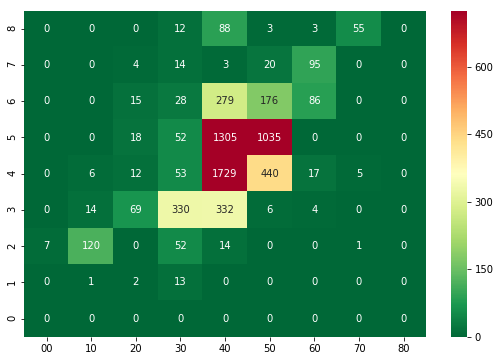

In [92]:
create_contour(0)

7200


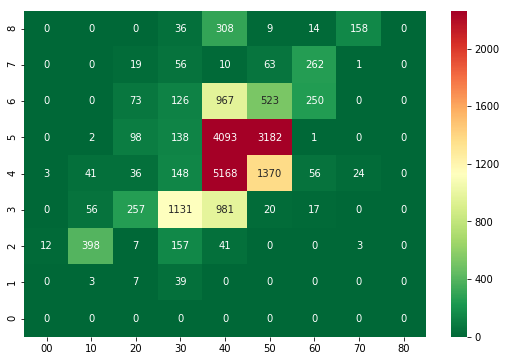

In [93]:
create_contour(1)

10800


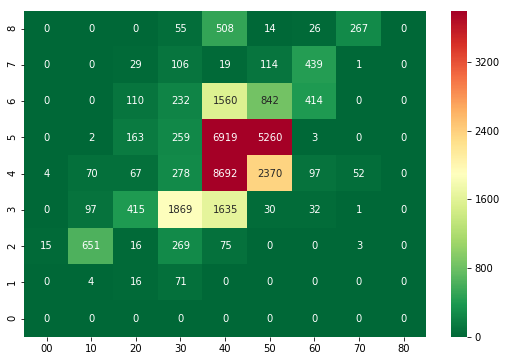

In [94]:
create_contour(2)

14400


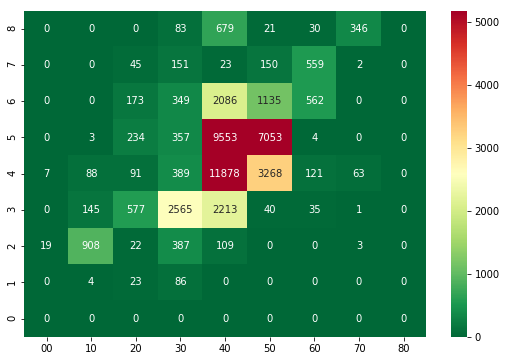

In [95]:
create_contour(3)

18000


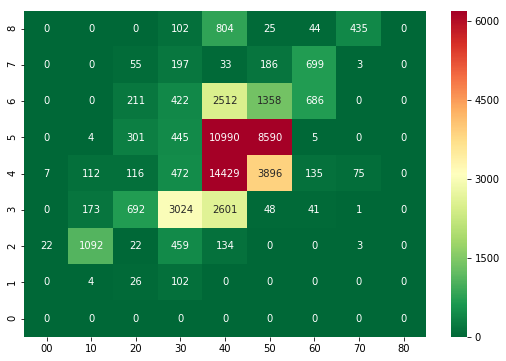

In [96]:
create_contour(4)

21600


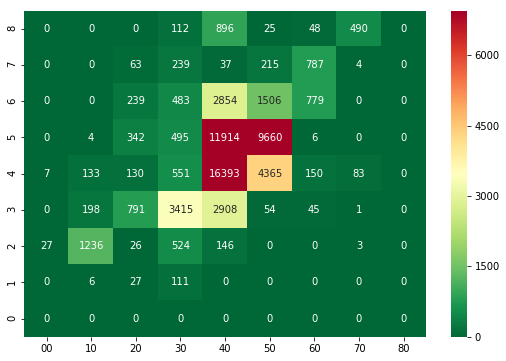

In [97]:
create_contour(5)